# Suicide Rates Analysis

This notebook provides the code for the preprocessing and analysis of the Suicide Rates dataset from Kaggle. The dataset can be found here:

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

The following analysis follows the CRISP-DM method. 

## Business Understanding

Since I found an interesting data set on Kaggle with suicide rates from 1985 to 2016 for multiple countries around the world, I will do an exploratory analysis of this data here. 

I want to answer the following questions:

1. How are suicide rates related to the HDI of a country?
2. Did the number of suicides change over time and if yes how and in which countries?
3. How is the age related to suicide rates in countries with high and low GDP?

## The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# open zip file with suicide rate data
df = pd.read_csv('suicide-rates-overview-1985-to-2016.zip', compression='zip')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Missing values

**1. Which columns have missing values?**

In [4]:
missings = df.isnull().sum()/len(df)

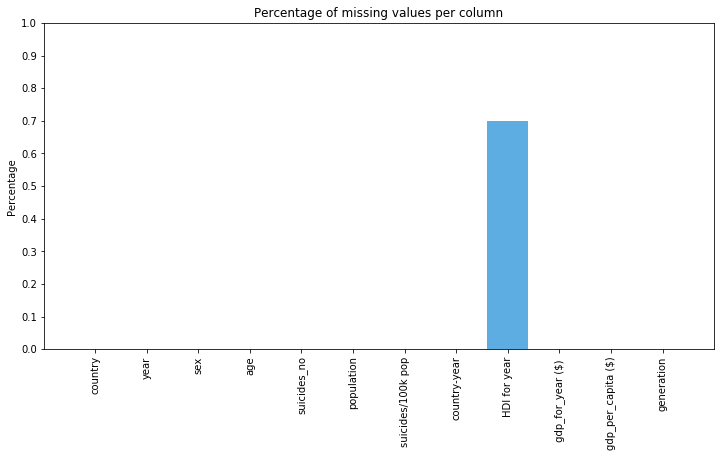

In [8]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(missings)), missings, color='#5DADE2')
plt.xticks(np.arange(len(missings)), missings.index, rotation='vertical')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('Percentage of missing values per column')
plt.ylabel('Percentage');

It looks like the only column with missing values is "HDI for year". In order to rule out the possibility of very small numbers of missing values, that might not be visible in the plot, I also check the numbers:

In [9]:
missings

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country-year          0.000000
HDI for year          0.699353
 gdp_for_year ($)     0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
dtype: float64

As already visible in the plot above, almost 70% of the data in "HDI for year" is missing, while there are no missing values in the other columns.

**2. Handling the missing values**

'HDI for year' is the 'Human Development Index' per year and country. It captures life expectancy, education as well as per capita income. It was developed to assess the development of a country by the people instead of only the economic growth. Hence, the HDI is interesting to look at in the context of suicide rates, since it also ()
includes measures of education and health of people in the country. 

Further information on the HDI as well as the data can be found here:

http://hdr.undp.org/en/content/human-development-index-hdi

### Add HDI data to the dataframe

In [17]:
hdi = pd.read_excel('2018_all_indicators.xlsx', sheet_name='Data')
hdi.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


The dataset includes data for multiple indices and countries for the years 1990 to 2017.

In [18]:
hdi.shape

(25636, 34)

In [20]:
#number of indicators included in the dataset
len(hdi.indicator_name.unique())

157

Take a subset of rows that belong to the HDI:

In [21]:
hdi = hdi[hdi['indicator_name'] == 'Human Development Index (HDI)']

In [22]:
hdi.shape

(189, 34)

In [23]:
hdi.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
189,Composite indices,137506,Human Development Index (HDI),AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,0.498
190,Composite indices,137506,Human Development Index (HDI),ALB,Albania,0.645,0.626,0.610,0.613,0.619,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,0.785
191,Composite indices,137506,Human Development Index (HDI),DZA,Algeria,0.577,0.581,0.587,0.591,0.595,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754,0.754
192,Composite indices,137506,Human Development Index (HDI),AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,0.858
193,Composite indices,137506,Human Development Index (HDI),AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581,0.581


In [31]:
hdi_missings = hdi.isnull().sum()/len(hdi)

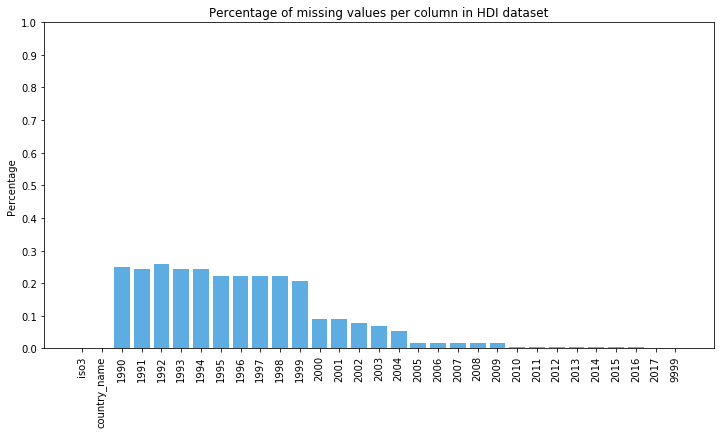

In [32]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(hdi_missings)), hdi_missings, color='#5DADE2')
plt.xticks(np.arange(len(hdi_missings)), hdi_missings.index, rotation='vertical')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('Percentage of missing values per column in HDI dataset')
plt.ylabel('Percentage');

The percentage of missing values is highest between 1990 and 1999. From 2000 onwards the percentage drops to approx. 10% and goes further down.

In [24]:
#checking if only HDI is left as indicator
hdi.indicator_name.value_counts()

Human Development Index (HDI)    189
Name: indicator_name, dtype: int64

Interesting columns: is03, country_name, year columns --> drop the rest

In [25]:
hdi.drop(['dimension','indicator_id','indicator_name'], axis=1, inplace=True)

In [26]:
#number of countries in suicide rates data
len(df.country.unique())

101

In [27]:
#number of countries in hdi data
len(hdi.country_name.unique())

189

In [28]:
np.sort(df.year.unique())

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [30]:
hdi.columns

Index([        'iso3', 'country_name',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011,
                 2012,           2013,           2014,           2015,
                 2016,           2017,           9999],
      dtype='object')

The number of years in each data set and the number of countries in each data set do not match. Let's find out where in the suicide rate data the HDI is actually missing (e.g. in which years):

In [34]:
hdi_missing = df[df['HDI for year'].isnull()]

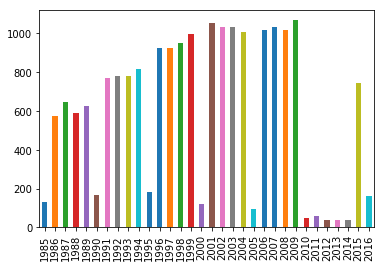

In [93]:
hdi_missing.year.value_counts().sort_index().plot(kind='bar');

# BREAK: Continuing with suicide data without HDI data

More recent years have the highest numbers of missing HDI. 

In [24]:
# how many unique countries are there per year in the suicide rates data?
for year in np.sort(df.year.unique()):
    unique_countries = len(df[df['year'] == year].country.unique())
    print("Year: {}, Number of unique countries: {}".format(year, unique_countries))

Year: 1985, Number of unique countries: 48
Year: 1986, Number of unique countries: 48
Year: 1987, Number of unique countries: 54
Year: 1988, Number of unique countries: 49
Year: 1989, Number of unique countries: 52
Year: 1990, Number of unique countries: 64
Year: 1991, Number of unique countries: 64
Year: 1992, Number of unique countries: 65
Year: 1993, Number of unique countries: 65
Year: 1994, Number of unique countries: 68
Year: 1995, Number of unique countries: 78
Year: 1996, Number of unique countries: 77
Year: 1997, Number of unique countries: 77
Year: 1998, Number of unique countries: 79
Year: 1999, Number of unique countries: 83
Year: 2000, Number of unique countries: 86
Year: 2001, Number of unique countries: 88
Year: 2002, Number of unique countries: 86
Year: 2003, Number of unique countries: 86
Year: 2004, Number of unique countries: 84
Year: 2005, Number of unique countries: 84
Year: 2006, Number of unique countries: 85
Year: 2007, Number of unique countries: 86
Year: 2008,

Notes:
- the number of countries per year varies, so it will not be possible to observe the development of suicide rates across all countries over all years
- a range of years with comparably many years is 2000 to 2015

### Find countries that all years from 2000 to 2015 have in common

In [94]:
# find a way to extract all common elements of multiple lists
set_1 = set([1,2,3,4,5])
set_2 = set([2,4,6,8,10])
set_3 = set([2,6,9,12,15])
(set_1 & set_2 & set_3)

{2}

In [95]:
# use this method to extract the countries that appear in all years from 2000 to 2015
set_2000 = set(df[df['year'] == 2000].country) 
set_2001 = set(df[df['year'] == 2001].country) 
set_2002 = set(df[df['year'] == 2002].country)
set_2003 = set(df[df['year'] == 2003].country) 
set_2004 = set(df[df['year'] == 2004].country) 
set_2005 = set(df[df['year'] == 2005].country)
set_2006 = set(df[df['year'] == 2006].country) 
set_2007 = set(df[df['year'] == 2007].country) 
set_2008 = set(df[df['year'] == 2008].country)
set_2009 = set(df[df['year'] == 2009].country) 
set_2010 = set(df[df['year'] == 2010].country) 
set_2011 = set(df[df['year'] == 2011].country)
set_2012 = set(df[df['year'] == 2012].country) 
set_2013 = set(df[df['year'] == 2013].country) 
set_2014 = set(df[df['year'] == 2014].country)
set_2015 = set(df[df['year'] == 2015].country)
if (set_2000 & set_2001 & set_2002 & set_2003 & set_2004 & set_2005 & set_2006 & 
    set_2007 & set_2008 & set_2009 & set_2010 & set_2011 & set_2012 & set_2013 & set_2014 & set_2015): 
    common_countries = (set_2000 & set_2001 & set_2002 & set_2003 & set_2004 & set_2005 & set_2006 & 
                        set_2007 & set_2008 & set_2009 & set_2010 & set_2011 & set_2012 & set_2013 & 
                        set_2014 & set_2015)
else:
    pass

In [96]:
years_of_interest = [2000, 2001, 2002, 2003, 2004, 2005, 2006,2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [97]:
# make subset of data with data from 2000 to 2015 and only from countries in the common_countries list
new_df = df[(df.year.isin(years_of_interest)) & (df.country.isin(list(common_countries)))]

In [98]:
new_df.year.value_counts().sort_index()

2000    588
2001    588
2002    588
2003    588
2004    588
2005    588
2006    588
2007    588
2008    588
2009    588
2010    588
2011    588
2012    588
2013    588
2014    588
2015    588
Name: year, dtype: int64

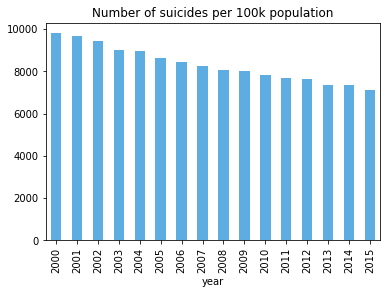

In [107]:
new_df.groupby('year')['suicides/100k pop'].sum().plot(kind='bar', color='#5DADE2')
plt.title('Number of suicides per 100k population');

- the number of suicides/100k population decreased over time (across all countries)

In [113]:
#look at a certain year in the data: 2015
data_2015 = new_df[new_df['year'] == 2015]

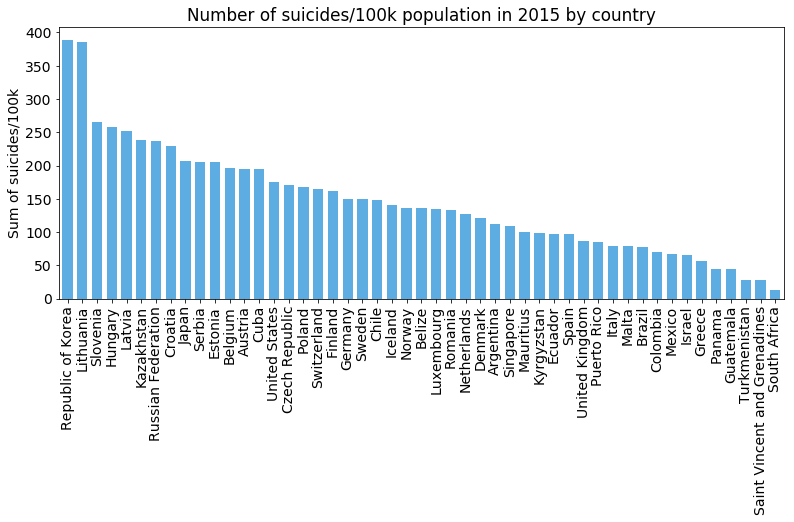

In [233]:
plt.figure(figsize=(13,5))
data_2015.groupby('country')['suicides/100k pop'].sum().sort_values(ascending=False).plot(kind='bar', 
                                                                                          color='#5DADE2', 
                                                                                          width=0.7)
plt.xlabel('')
plt.ylabel('Sum of suicides/100k')
plt.title('Number of suicides/100k population in 2015 by country');

- the Republic of Korea and Lithuania have the highest numbers of suicides/100k population in the dataset with almost 400 suicides/100k population
- the smallest number of suicides per 100k population occurs in South Africa

## Age groups

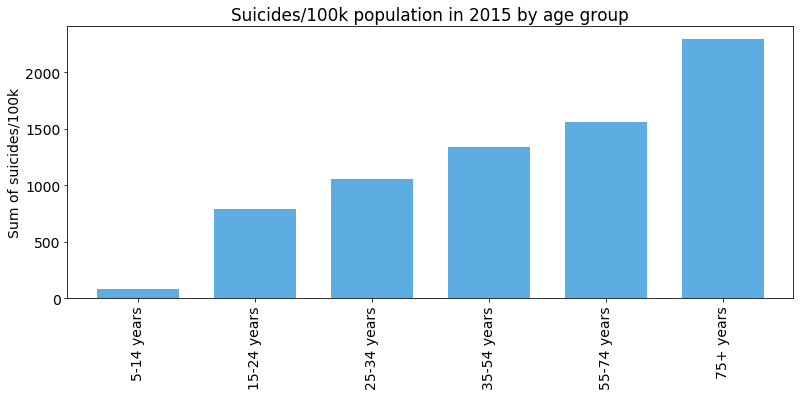

In [239]:
plt.figure(figsize=(13,5))
data_2015.groupby('age')['suicides/100k pop'].sum().sort_values().plot(kind='bar', color='#5DADE2', width=0.7)
plt.xlabel('')
plt.ylabel('Sum of suicides/100k')
plt.title('Suicides/100k population in 2015 by age group');

In [243]:
data_2015.groupby('age')['suicides/100k pop'].sum().sort_values()

age
5-14 years       78.27
15-24 years     787.45
25-34 years    1055.64
35-54 years    1341.17
55-74 years    1556.77
75+ years      2291.02
Name: suicides/100k pop, dtype: float64

In [244]:
data_2000 = new_df[new_df['year'] == 2000]

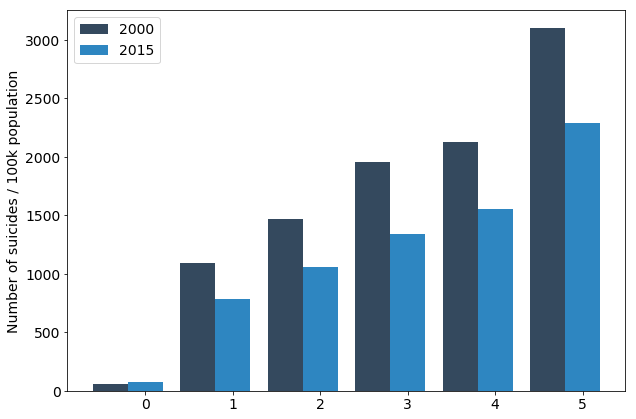

In [254]:
bars_2015 = data_2015.groupby('age')['suicides/100k pop'].sum().sort_values().values
bars_2000 = data_2000.groupby('age')['suicides/100k pop'].sum().sort_values().values

#ind = np.arange(len(bars_2000))  # the x locations for the months
width = 0.4  # the width of the bars 

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(ind - width, bars_2000, width, color='#34495E', label='2000')
rects2 = ax.bar(ind , bars_2015, width, color='#2E86C1', label='2015')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Number of suicides / 100k population', fontdict={'fontsize':14})
#ax.set_title('Number of tickets started, solved, and closed per month in 2018', fontdict={'fontsize':16})
#ax.set_xticks(ind)
#ax.set_xticklabels((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015), 
#                   fontdict={'fontsize':14}, 
#                   rotation=45)
#ax.set_yticklabels(('10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k','90k'))
ax.legend()
#plt.savefig('#Suicides100kGDPPC.png', dpi=600);

In [129]:
# group countries into 4 buckets by gdp per capita --> use quantiles
new_df['gdppc_buckets'] = pd.qcut(new_df['gdp_per_capita ($)'], 3, labels=["low", "medium", "high"])

/home/annalena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
new_df.gdppc_buckets.value_counts()

low       3144
high      3132
medium    3132
Name: gdppc_buckets, dtype: int64

In [177]:
new_df.head(50)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,hdi_un,gdppc_buckets
768,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462,G.I. Generation,None,low
769,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462,Silent,None,low
770,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462,Boomers,None,low
771,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462,Generation X,None,low
772,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462,Generation X,None,low
773,Argentina,2000,female,55-74 years,133,2760512,4.82,Argentina2000,0.762,"284,203,750,000",8462,Silent,None,low
774,Argentina,2000,female,75+ years,43,941957,4.56,Argentina2000,0.762,"284,203,750,000",8462,G.I. Generation,None,low
775,Argentina,2000,female,35-54 years,174,4253771,4.09,Argentina2000,0.762,"284,203,750,000",8462,Boomers,None,low
776,Argentina,2000,female,15-24 years,116,3249247,3.57,Argentina2000,0.762,"284,203,750,000",8462,Generation X,None,low
777,Argentina,2000,female,25-34 years,63,2617723,2.41,Argentina2000,0.762,"284,203,750,000",8462,Generation X,None,low


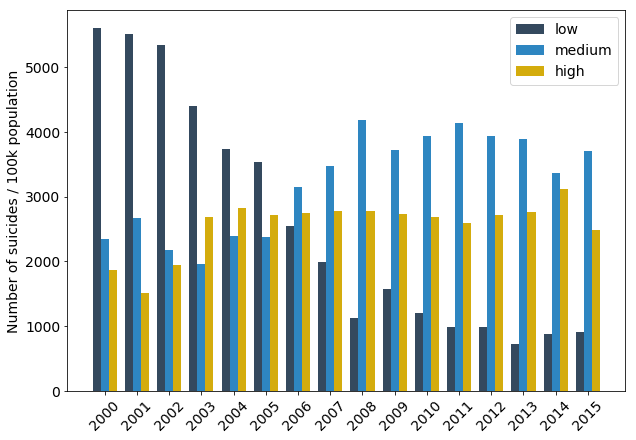

In [157]:
low_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].sum()['low'].values
med_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].sum()['medium'].values
high_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].sum()['high'].values 

ind = np.arange(len(low_gdp))  # the x locations for the months
width = 0.25  # the width of the bars 

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(ind - width, low_gdp, width, color='#34495E', label='low')
rects2 = ax.bar(ind , med_gdp, width, color='#2E86C1', label='medium')
rects3 = ax.bar(ind + width, high_gdp, width, color='#D4AC0D', label='high')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Number of suicides / 100k population', fontdict={'fontsize':14})
#ax.set_title('Number of tickets started, solved, and closed per month in 2018', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels((2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015), 
                   fontdict={'fontsize':14}, 
                   rotation=45)
#ax.set_yticklabels(('10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k','90k'))
ax.legend()
plt.savefig('#Suicides100kGDPPC.png', dpi=600);

In [258]:
new_df.country.unique()

array(['Argentina', 'Austria', 'Belgium', 'Belize', 'Brazil', 'Chile',
       'Colombia', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Germany', 'Greece', 'Guatemala',
       'Hungary', 'Iceland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'Norway', 'Panama', 'Poland',
       'Puerto Rico', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Vincent and Grenadines', 'Serbia',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkmenistan', 'United Kingdom', 'United States'],
      dtype=object)

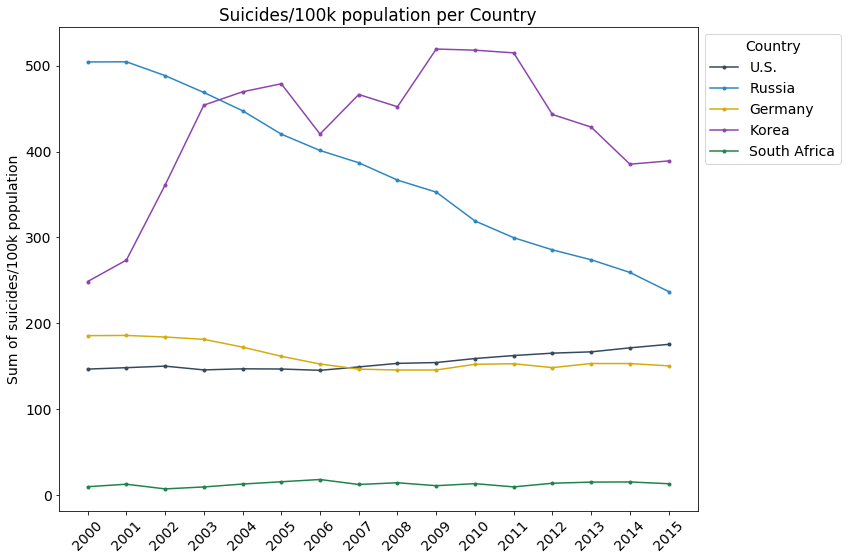

In [266]:
us = new_df.groupby(['country','year'])['suicides/100k pop'].sum()['United States'].values
russia = new_df.groupby(['country','year'])['suicides/100k pop'].sum()['Russian Federation'].values
germany = new_df.groupby(['country','year'])['suicides/100k pop'].sum()['Germany'].values
korea = new_df.groupby(['country','year'])['suicides/100k pop'].sum()['Republic of Korea'].values
sa = new_df.groupby(['country','year'])['suicides/100k pop'].sum()['South Africa'].values

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(us, label='U.S.', marker='.', color='#34495E')
plt.plot(russia, label='Russia', color='#2E86C1', marker='.')
plt.plot(germany, label='Germany', color='#D4AC0D', marker='.')
plt.plot(korea, label='Korea', color='#8E44AD', marker='.')
plt.plot(sa, label='South Africa', color='#1E8449', marker='.')

plt.xticks(r, [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015],
          rotation=45)
#plt.yticks(np.arange(0,50000,10000),['0','10k','20k','30k','40k','50k'])
plt.ylabel('Sum of suicides/100k population')
plt.title('Suicides/100k population per Country')
lgd = plt.legend(bbox_to_anchor=(1,1), title='Country')
plt.tight_layout();
#plt.savefig('#Suicides100kGDPPC_lineplot.png', dpi=600);

In [256]:
new_df.groupby(['country','year'])['suicides/100k pop'].sum()['United States']

year
2000    146.58
2001    148.22
2002    150.02
2003    145.64
2004    146.90
2005    146.68
2006    145.13
2007    149.12
2008    153.24
2009    154.19
2010    158.89
2011    162.36
2012    165.14
2013    166.67
2014    171.33
2015    175.41
Name: suicides/100k pop, dtype: float64

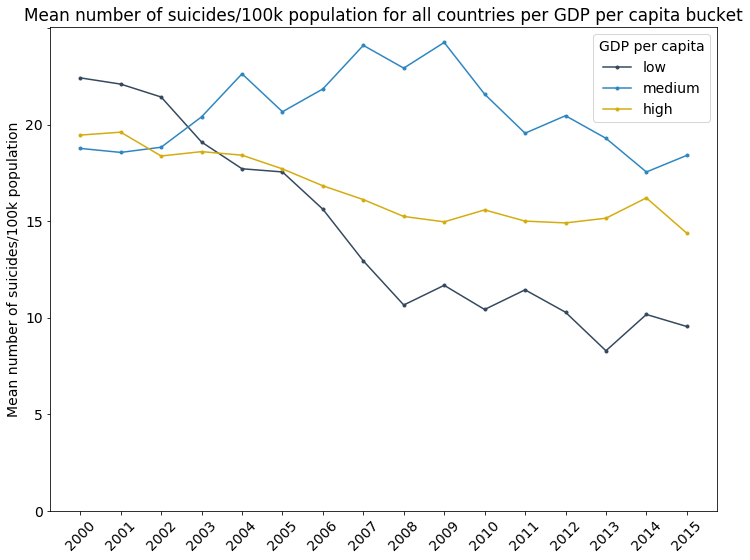

In [170]:
low_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].mean()['low'].values
med_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].mean()['medium'].values
high_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].mean()['high'].values

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(low_gdp, label='low', color='#34495E', marker='.')
plt.plot(med_gdp, label='medium', color='#2E86C1', marker='.')
plt.plot(high_gdp, label='high', color='#D4AC0D', marker='.')

plt.xticks(r, [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015],
           rotation=45)
plt.yticks(np.arange(0,22,4),['0','5','10','15','20'])
plt.ylabel('Mean number of suicides/100k population')
plt.title('Mean number of suicides/100k population for all countries per GDP per capita bucket')
lgd = plt.legend(bbox_to_anchor=(1,1), title='GDP per capita')
plt.tight_layout();
#plt.savefig('#Suicides100kGDPPC_lineplot.png', dpi=600);

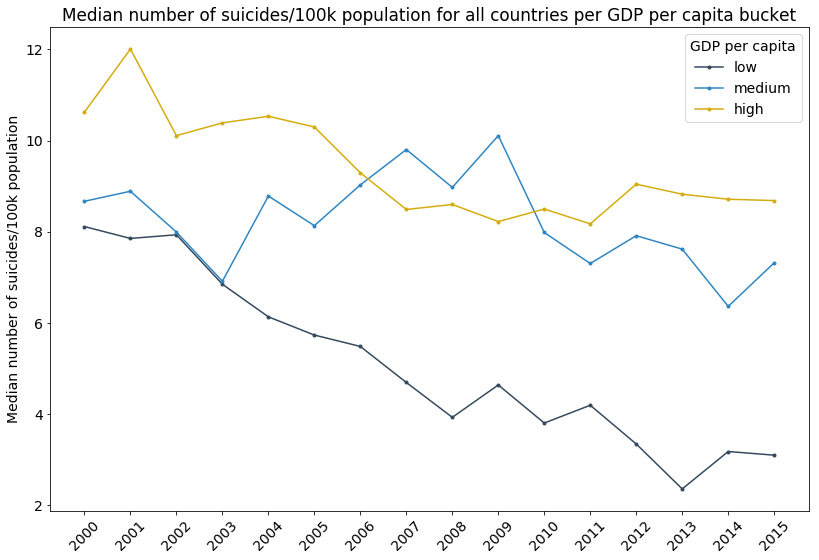

In [171]:
low_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].median()['low'].values
med_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].median()['medium'].values
high_gdp = new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].median()['high'].values

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(low_gdp, label='low', color='#34495E', marker='.')
plt.plot(med_gdp, label='medium', color='#2E86C1', marker='.')
plt.plot(high_gdp, label='high', color='#D4AC0D', marker='.')

plt.xticks(r, [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013, 2014, 2015],
           rotation=45)
#plt.yticks(np.arange(0,22,4),['0','5','10','15','20'])
plt.ylabel('Median number of suicides/100k population')
plt.title('Median number of suicides/100k population for all countries per GDP per capita bucket')
lgd = plt.legend(bbox_to_anchor=(1,1), title='GDP per capita')
plt.tight_layout();
#plt.savefig('#Suicides100kGDPPC_lineplot.png', dpi=600);

In [176]:
new_df.groupby(['gdppc_buckets','year'])['suicides/100k pop'].max()

gdppc_buckets  year
low            2000    144.15
               2001    134.39
               2002    157.48
               2003    115.34
               2004    107.27
               2005    108.27
               2006    103.55
               2007     91.59
               2008     85.47
               2009     96.20
               2010     93.52
               2011     98.05
               2012     90.12
               2013     82.96
               2014     84.04
               2015     82.62
medium         2000    120.97
               2001    144.71
               2002    130.46
               2003    170.86
               2004    172.80
               2005    176.33
               2006    154.63
               2007    172.86
               2008    154.92
               2009    173.86
               2010    182.32
               2011    185.37
               2012    152.45
               2013    147.59
               2014     91.41
               2015    140.74
high           2000 

In [210]:
russia = new_df[new_df['country'] == 'Russian Federation']
us = new_df[new_df['country'] == 'United States']

In [216]:
russia_gdppc = russia.groupby('year').mean()['gdp_per_capita ($)'].values
us_gdppc = us.groupby(['year']).mean()['gdp_per_capita ($)'].values